##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30 

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000 

(25, 2)


Text(0.5, 1.0, 'Wstępny wykres dla df SCORES.csv')

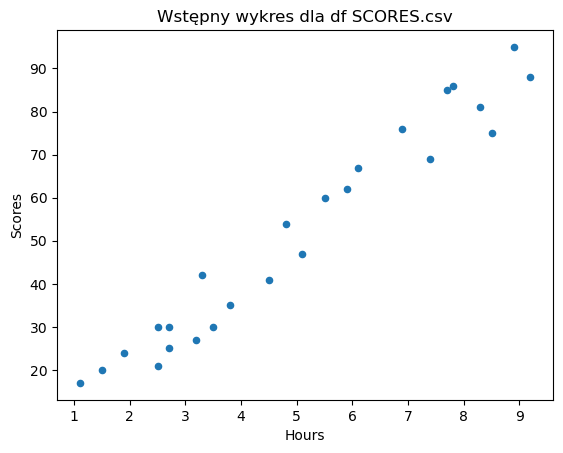

In [1]:
from sklearn import linear_model, metrics, model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_scores = pd.read_csv("SCORES.csv")
print(df_scores.head(5), "\n")
print(df_scores.describe(), "\n")
print(df_scores.shape)

scatter_scores = df_scores.plot.scatter(x = "Hours", y = "Scores")
plt.title("Wstępny wykres dla df SCORES.csv")


Widać, że zależność pomiędzy dwoma parametrami jest liniowa.

In [2]:
from sklearn import model_selection, linear_model
from patsy import dmatrix, dmatrices
from sklearn.model_selection import train_test_split

x = df_scores["Hours"].to_numpy().reshape(-1, 1)
y = df_scores["Scores"].to_numpy().reshape(-1, 1)

#formula = "Hours ~ Scores"
# x, y = dmatrices("{}".format(formula),df_scores, return_type="dataframe")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size = 0.3)

# creating linear regression object:
lin_regr = linear_model.LinearRegression()

# training the model using training sets:
lin_regr.fit(x_train, y_train)

# coef and intercept:
l_r_coef = lin_regr.coef_
l_r_interc = lin_regr.intercept_
print("Współczynnik modelu: {}".format(l_r_coef[0][0]))
print("Wskaźnik intercept dla naszego modelu wynosi: {}".format(l_r_interc[0]))

Współczynnik modelu: 10.896058223025449
Wskaźnik intercept dla naszego modelu wynosi: -0.9877155277682874


**coef_** -> Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features. In our case it's just one value since our matrixes are actually vectors. (Czynnik alfa w y = alfa*x + beta)

**intercept_** -> Independent term in the linear model. Set to 0.0 if fit_intercept = False. (Czynnik beta w y = alfa*x + beta)

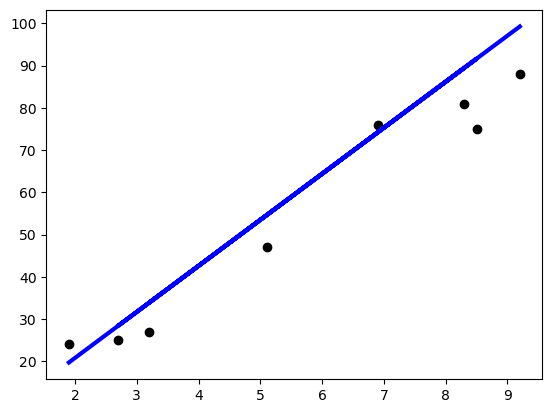

In [3]:
# y prediction based on x_test:
lin_regr_y_pred = lin_regr.predict(x_test)

plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, lin_regr_y_pred, color="blue", linewidth=3)

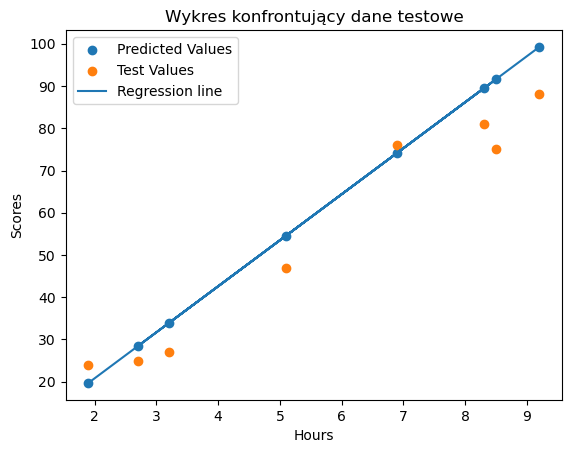

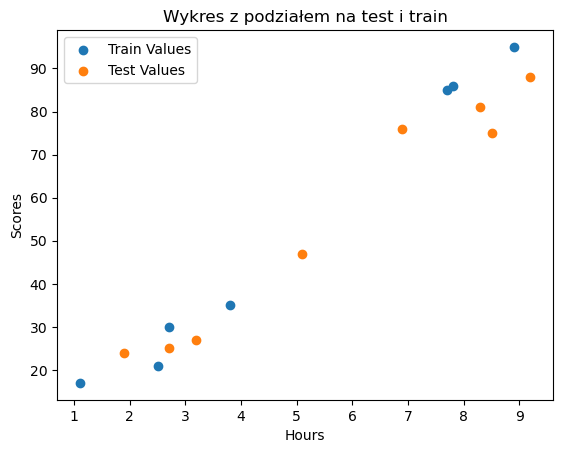

Mean absolute error: 7.539747472280562
Mean Squared Error: 76.60321143755554
Root Mean Squared Error 8.752326058686087


In [4]:
plt.title("Wykres konfrontujący dane testowe")
plt.scatter(x_test, lin_regr_y_pred, label='Predicted Values')
plt.scatter(x_test, y_test, label='Test Values')
plt.plot(x_test, lin_regr_y_pred, label='Regression line')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()

#Wyniki przedstawione na wykresie
plt.scatter(x_train, y_train, label='Train Values')
plt.scatter(x_test, y_test, label='Test Values')
plt.title("Wykres z podziałem na test i train")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

#9
m_a_e = metrics.mean_absolute_error(lin_regr_y_pred, y_test)
m_s_e = metrics.mean_squared_error(lin_regr_y_pred, y_test)
root_m_s_e = np.sqrt(m_s_e)

print("Mean absolute error: {}".format(m_a_e))
print("Mean Squared Error: {}".format(m_s_e))
print("Root Mean Squared Error {}".format(root_m_s_e))

   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132 

             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000 

(19, 2)


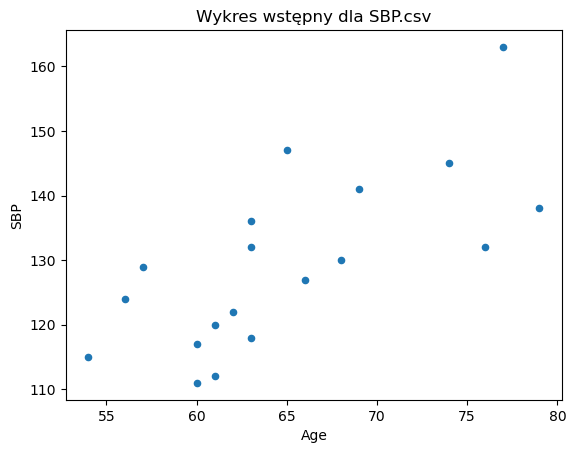

Współczynnik modelu: 0.9810126582278486
Wskaźnik intercept dla naszego modelu wynosi: 65.07215189873416


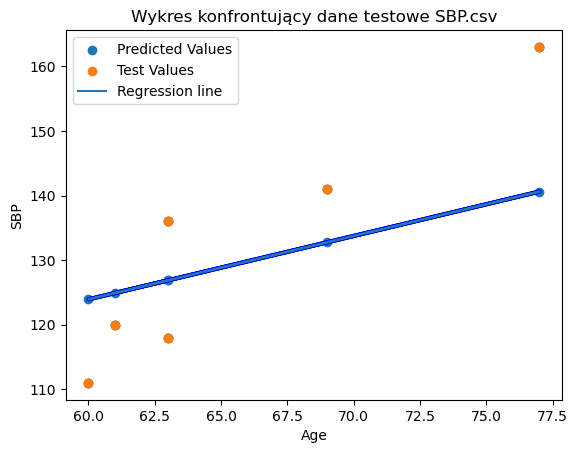

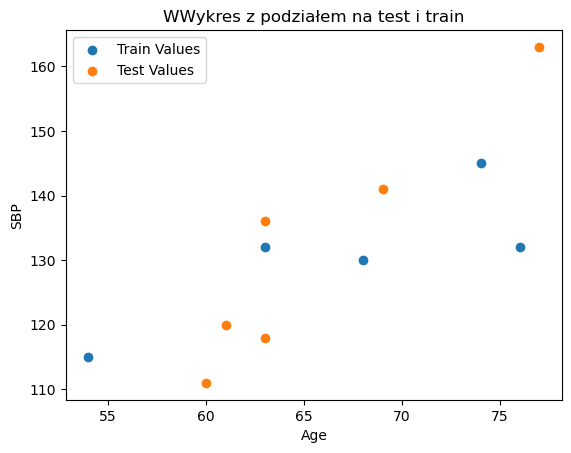

Mean absolute error: 11.07911392405063
Mean Squared Error: 153.7680470544249
Root Mean Squared Error 12.400324473755713


In [5]:
# SBP.csv analogicznie:
def lin_regr(csv, flag, title1, split_size, x_col, y_col):
    df = pd.read_csv(csv)
    if flag == 1:
        print(df.head(5), "\n")
        print(df.describe(), "\n")
        print(df.shape)

    df.plot.scatter(x = x_col, y = y_col)
    plt.title(title1)
    plt.show()
    
    x = df[x_col].to_numpy().reshape(-1, 1)
    y = df[y_col].to_numpy().reshape(-1, 1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_size, train_size = split_size)

    # creating linear regression object:
    lin_regr_SBP = linear_model.LinearRegression()

    # training the model using training sets:
    lin_regr_SBP.fit(x_train, y_train)

    # coef and intercept:
    l_r_SBP_coef = lin_regr_SBP.coef_
    l_r_SBP_interc = lin_regr_SBP.intercept_
    print("Współczynnik modelu: {}".format(l_r_SBP_coef[0][0]))
    print("Wskaźnik intercept dla naszego modelu wynosi: {}".format(l_r_SBP_interc[0]))

    # y prediction based on x_test:
    lin_regr_sbp_pred = lin_regr_SBP.predict(x_test)

    plt.scatter(x_test, y_test, color="black")
    plt.plot(x_test, lin_regr_sbp_pred, color="blue", linewidth=3)

    plt.title("Wykres konfrontujący dane testowe {}".format(csv))
    plt.scatter(x_test, lin_regr_sbp_pred, label='Predicted Values')
    plt.scatter(x_test, y_test, label='Test Values')
    plt.plot(x_test, lin_regr_sbp_pred, label='Regression line')
    plt.xlabel("Age")
    plt.ylabel("SBP")
    plt.legend()
    plt.show()

    #Wyniki przedstawione na wykresie
    plt.scatter(x_train, y_train, label='Train Values')
    plt.scatter(x_test, y_test, label='Test Values')
    plt.title("WWykres z podziałem na test i train")
    plt.xlabel('Age')
    plt.ylabel('SBP')
    plt.legend()
    plt.show()

    #9
    m_a_e = metrics.mean_absolute_error(lin_regr_sbp_pred, y_test)
    m_s_e = metrics.mean_squared_error(lin_regr_sbp_pred, y_test)
    root_m_s_e = np.sqrt(m_s_e)

    print("Mean absolute error: {}".format(m_a_e))
    print("Mean Squared Error: {}".format(m_s_e))
    print("Root Mean Squared Error {}".format(root_m_s_e))
    
lin_regr("SBP.csv", 1, "Wykres wstępny dla SBP.csv", 0.3, "Age", "SBP")

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

### Podatek paliwowy:

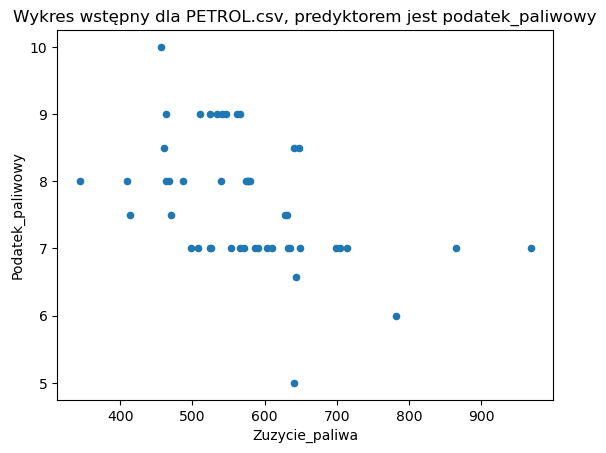

Współczynnik modelu: -0.005785731196797348
Wskaźnik intercept dla naszego modelu wynosi: 11.042836138523292


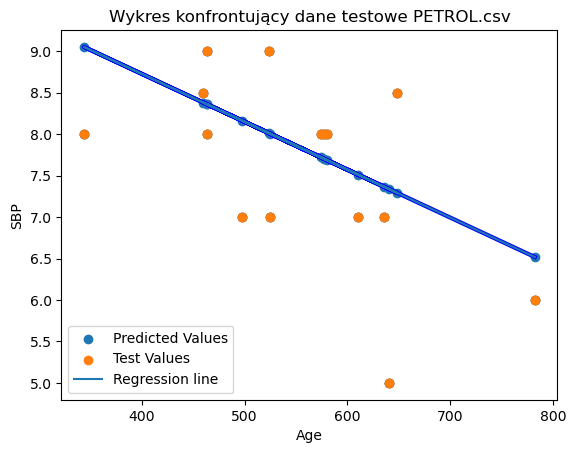

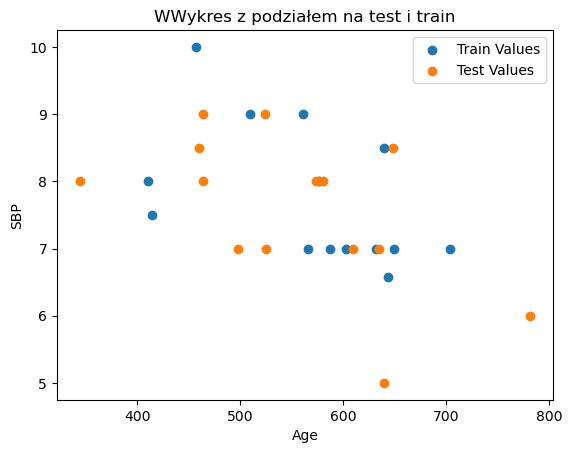

Mean absolute error: 0.7440407003648181
Mean Squared Error: 0.8574447243436898
Root Mean Squared Error 0.9259831123426009


In [6]:
# Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
lin_regr("PETROL.csv", 0, "Wykres wstępny dla PETROL.csv, predyktorem jest podatek_paliwowy", 0.3, "Zuzycie_paliwa", "Podatek_paliwowy")

### Średni przychód:

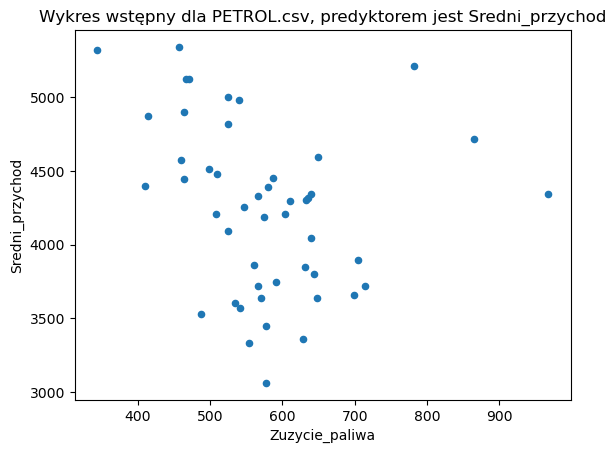

Współczynnik modelu: -0.018975402522148573
Wskaźnik intercept dla naszego modelu wynosi: 4044.3916115617844


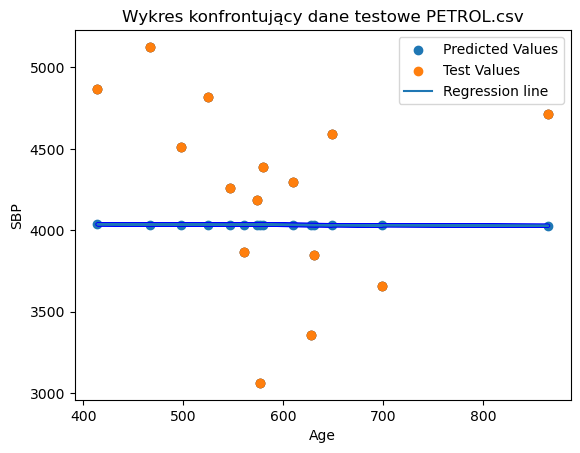

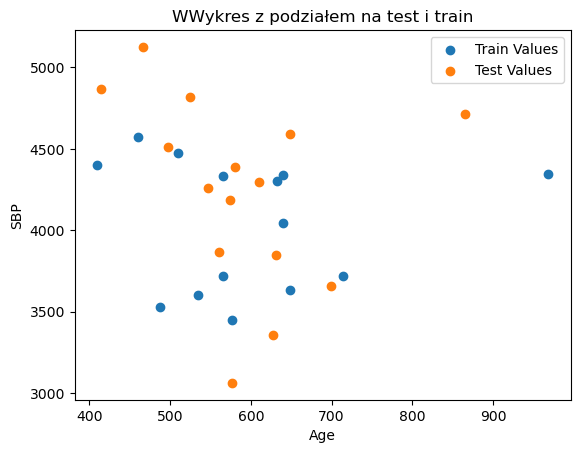

Mean absolute error: 520.5336118021263
Mean Squared Error: 358997.7154518432
Root Mean Squared Error 599.1641807149716


In [7]:
lin_regr("PETROL.csv", 0, "Wykres wstępny dla PETROL.csv, predyktorem jest Sredni_przychod", 0.3, "Zuzycie_paliwa", "Sredni_przychod")

### Utwardzone autostrady:

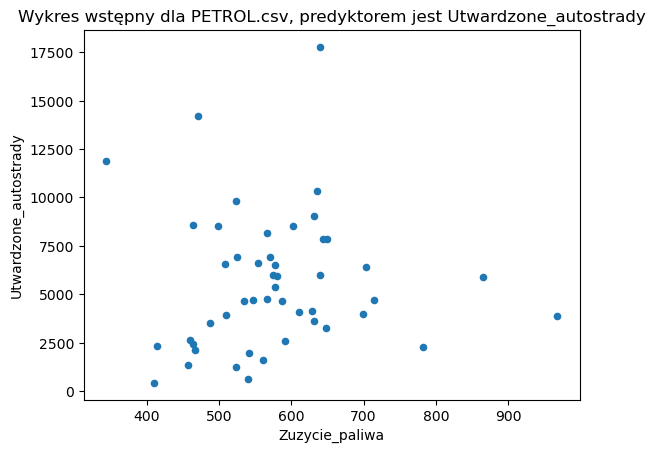

Współczynnik modelu: -2.9080737571756954
Wskaźnik intercept dla naszego modelu wynosi: 6752.780363718859


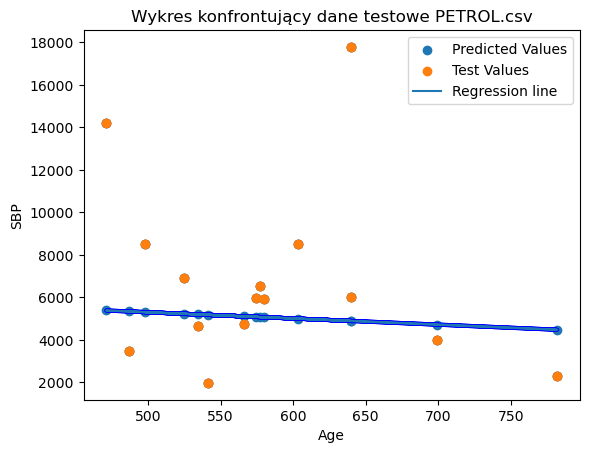

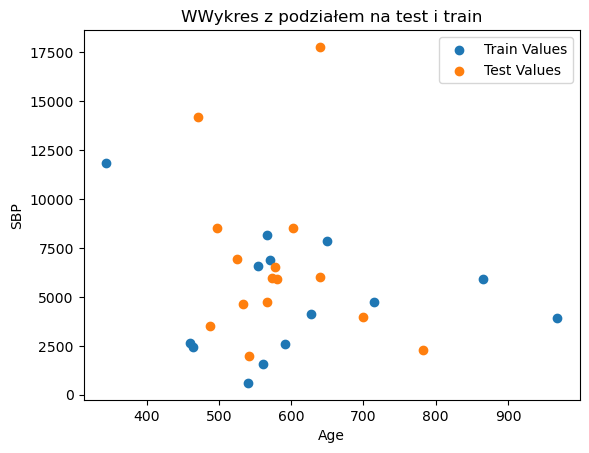

Mean absolute error: 2887.1907647233193
Mean Squared Error: 19559750.198113162
Root Mean Squared Error 4422.640636329518


In [8]:
lin_regr("PETROL.csv", 0, "Wykres wstępny dla PETROL.csv, predyktorem jest Utwardzone_autostrady", 0.3, "Zuzycie_paliwa", "Utwardzone_autostrady")

### Procent ludności z prawem jazdy:

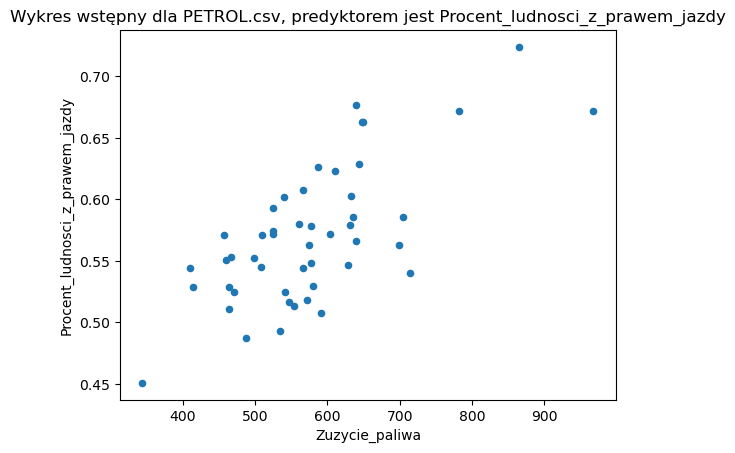

Współczynnik modelu: 0.0002765831705820755
Wskaźnik intercept dla naszego modelu wynosi: 0.41575384296550855


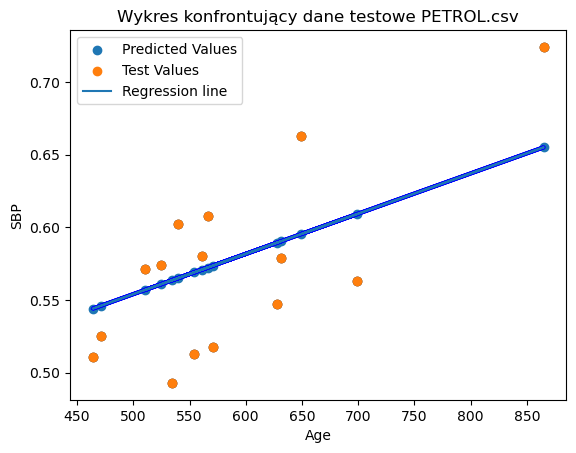

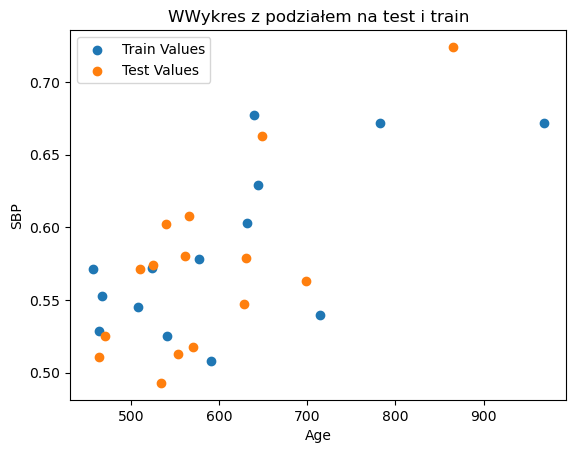

Mean absolute error: 0.03877905255207239
Mean Squared Error: 0.0019484719029227585
Root Mean Squared Error 0.044141498648355364


In [9]:
lin_regr("PETROL.csv", 0, "Wykres wstępny dla PETROL.csv, predyktorem jest Procent_ludnosci_z_prawem_jazdy", 0.3, "Zuzycie_paliwa", "Procent_ludnosci_z_prawem_jazdy")

## Wnioski:

Regresja liniowa nie zadziałała w przypadku pierwszych trzech predyktorów, dała wynik w miare zadowalający tylko dla procentu ludności z prawem jazdy jako predyktor. Na wynik mogły mieć wpływ wariancje w danych, które sprawiały, że 30% losowo wybranych danych wybieranych do treningu modelu liniowego regresji nie było reprezentatywne

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [10]:
# importy potrzebne na później:
from sklearn import metrics
from sklearn.metrics import classification_report
# wczytanie danych i prezentacja:
df_heart = pd.read_csv("HEART.csv")
print(df_heart.head(5))
print(df_heart.describe(),'\n')
print(df_heart.shape)

# przetworzenie danych:
# zamiana '?' na NaN'y
df_heart = df_heart.replace('?', np.NaN)
# df_heart.head(5)

# drop column, które mają większość NaN
df_heart = df_heart.drop(columns=['slope', 'ca', 'thal'])
# remove rows with missing values:
df_heart = df_heart.dropna(axis = "rows")

# remove rows with missing values:
# df_heart = df_heart.dropna(axis = 'rows')
df_heart
# 

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  
              age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.0000

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [11]:
# zakodowanie niezależnych zmiennych kategorialnych jako dummy:
df_heart = pd.get_dummies(df_heart, columns=["cp", "restecg"])
df_heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
292,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [12]:
# zamiana kolumn df_heart na array'e z numpy'a, aby uzyc ich w funkcji train_test_split 
df_heart_arrays = df_heart.to_numpy()
# print(df_heart_arrays)

# ponieważ na końcu pierwszego wierszu w HEART.csv jest pare białych znaków - spacji, trzeba je również zastosować przy adresowaniu df[__]:num
x_train, x_test, y_train, y_test = train_test_split(df_heart_arrays, np.array(df_heart["cp_2"]), test_size=0.20)
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_heart_arrays, np.array(df_heart["num       "]), test_size=0.20)
#logistic_regr = linear_model.LogisticRegression(solver='liblinear', max_iter=100).fit(x_train, y_train.ravel())
#logistic_regr = linear_model.LogisticRegression(solver='saga', max_iter=100).fit(x_train, y_train.ravel())
logistic_regr_cp_2 = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train, y_train.ravel())
logistic_regr_num = linear_model.LogisticRegression(solver='liblinear', max_iter=1000).fit(x_train1, y_train1.ravel())

y_pred_cp_2 = logistic_regr_cp_2.predict(x_test)
y_pred_num = logistic_regr_num.predict(x_test1)

# dla wybranej kolumny cp_2
print("Predykcje wartości y: {}".format(y_pred_cp_2),"\n")

print("------------------CLASSIFICATION REPORT---------------")
print(classification_report(y_test, y_pred_cp_2),"\n")

# dla wybranej kolumny num:
print("Predykcje wartości y: {}".format(y_pred_num),"\n")

print("------------------CLASSIFICATION REPORT---------------")
print(classification_report(y_test1, y_pred_num))

Predykcje wartości y: [1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0] 

------------------CLASSIFICATION REPORT---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        18

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53
 

Predykcje wartości y: [0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0] 

------------------CLASSIFICATION REPORT---------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.94      1.00      0.97        17

    accuracy                           0.98        53
   macro avg       0.97      0.99      0.98        53
weighted avg       0.98

Wybróbowałem różne solvery dla różnych kolumn i zwiększyłem liczbę iteracji, aby osiągnąć bardziej dokładne wyniki